In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [13]:

class Kernel:

    def __init__(self, kernel_str) -> None:
        assert kernel_str in [
            "gaussian", 
            "uniform", 
            "epanechnikov", 
            "quadratic", 
            "triangular", 
            "one-sided epanechnikov (R)",
            "one-sided epanechnikov (L)"
            ]
        self.kernel_str = kernel_str

    def __call__(self, x):
        if self.kernel_str == "gaussian":
            return (1 / np.sqrt(2 * np.pi)) * np.exp(-(x ** 2) / 2)
        elif self.kernel_str == "uniform":
            return 1 / 2 * (np.abs(x) <= 1) 
        elif self.kernel_str == "epanechnikov":
            return (1 - x ** 2) * 3 / 4 * (np.abs(x) <= 1)
        elif self.kernel_str == "quadratic":
            return 15 / 16 * (1 - x ** 2) ** 2 * (np.abs(x) <= 1)
        elif self.kernel_str == "triangular":
            return (1 - np.abs(x)) * (np.abs(x) <= 1)
        elif self.kernel_str == "one-sided epanechnikov (R)":
            return (1 - x ** 2) * 3 / 2 * (x > 0) * (x < 1)
        elif self.kernel_str == "one-sided epanechnikov (L)":
            return (1 - x ** 2) * 3 / 2 * (x > -1) * (x < 0)

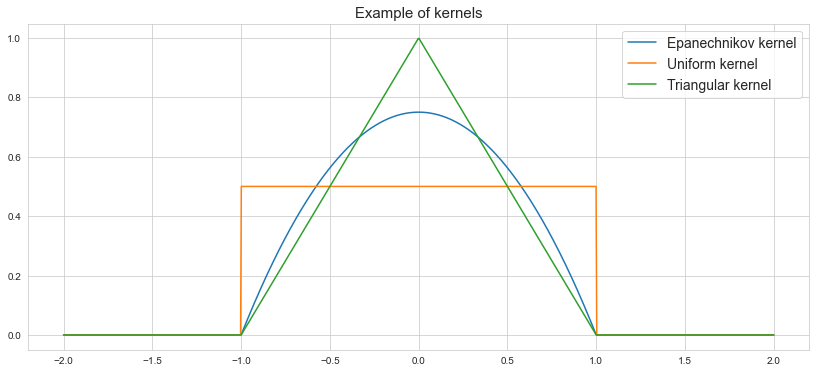

In [4]:
x = np.linspace(-2, 2, 1000)

fig, ax = plt.subplots(figsize=(14, 6))
sns.lineplot(x=x, y=Kernel("epanechnikov")(x), label="Epanechnikov kernel")
sns.lineplot(x=x, y=Kernel("uniform")(x), label="Uniform kernel")
sns.lineplot(x=x, y=Kernel("triangular")(x), label="Triangular kernel")

ax.legend(fontsize=14)
ax.set_title("Example of kernels", fontsize=15);

# plt.savefig("kernels.pdf", bbox_inches="tight")

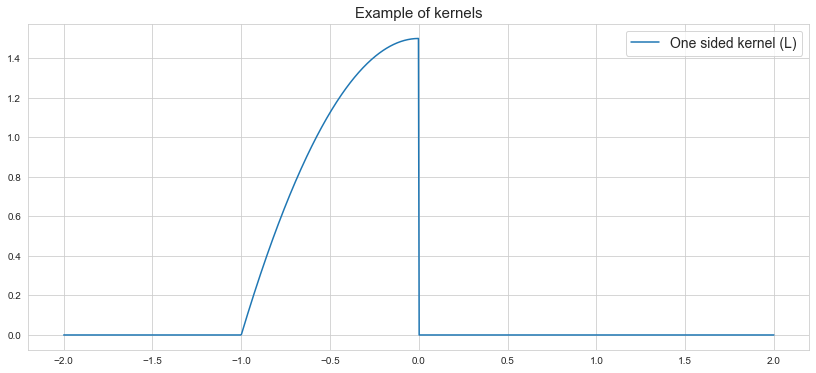

In [15]:
x = np.linspace(-2, 2, 1000)

fig, ax = plt.subplots(figsize=(14, 6))
# sns.lineplot(x=x, y=Kernel("one-sided epanechnikov (R)")(x), label="One sided kernel (R)")
sns.lineplot(x=x, y=Kernel("one-sided epanechnikov (L)")(x), label="One sided kernel (L)")

ax.legend(fontsize=14)
ax.set_title("Example of kernels", fontsize=15);

In [2]:
def reflect_time_series(time_series: np.ndarray, left_point: tuple[float] = None, right_point: tuple[float] = None) -> np.ndarray:
    new_time_series = time_series.copy()
    if right_point is not None:
        time_series_right = np.flip(2 * right_point[1] - time_series)
        new_time_series = np.concatenate([new_time_series, time_series_right])
    if left_point is not None:
        time_series_left = np.flip(2 * left_point[1] - time_series)
        new_time_series = np.concatenate([time_series_left, new_time_series])
    return new_time_series

In [14]:
def convert_u_list(u_list: np.ndarray) -> np.ndarray:
    """
    Converts u_list which is a partition between 0 and 1 to a partition between 1/3 and 2/3.
    This function is used after  reflecting the time series.
    """
    return (u_list + 1) / 3 

<AxesSubplot:>

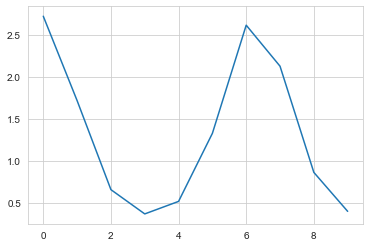

In [11]:
time_series = np.exp(np.cos(np.arange(10)))

sns.lineplot(data=time_series)

<AxesSubplot:>

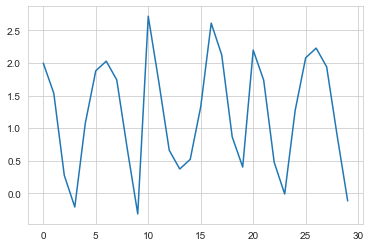

In [12]:
reflected_time_series = reflect_time_series(time_series, (0, 1.2), (9, 1.3))
sns.lineplot(data=reflected_time_series)

In [15]:
u_list = np.linspace(0, 1, 10)
convert_u_list(u_list)

array([0.33333333, 0.37037037, 0.40740741, 0.44444444, 0.48148148,
       0.51851852, 0.55555556, 0.59259259, 0.62962963, 0.66666667])